In [ ]:
import numpy as np
from scipy.special import softmax

from sklearn.base import BaseEstimator
from sklearn.tree import DecisionTreeRegressor

from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
from scipy.special import softmax

class GradientBoostingClassifier(BaseEstimator):
    
    @staticmethod
    def sigmoid(z):
        return 1 / (1 + np.exp(-z))
    
    @staticmethod
    def softmaX(z):
        return softmax(z, axis=1)
          
    @staticmethod
    def log_loss_grad(y_true, y_pred):
        return GradientBoostingClassifier.sigmoid(y_pred) - y_true
    
    @staticmethod
    def cross_entropy_grad(y_true, y_pred):
        return GradientBoostingClassifier.softmaX(y_pred) - y_true
    
    def __init__(self, n_estimators=20, learning_rate=0.01, loss='log_loss', 
                 max_depth=3, random_state=17):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.loss_name = loss
        self.max_depth = max_depth
        self.random_state = random_state
        self.residuals_ = 0
        self.trees_ = []
            
    def fit(self, X, y):
        if self.loss_name == 'log_loss':
            self.b_initial = y.mean()
            pred_fit = np.ones(len(X)) * self.b_initial
        elif self.loss_name == 'cross_entropy':
            self.b_initial = 1 / y.shape[0]
            pred_fit = np.full((y.shape[0], y.shape[1]), self.b_initial)

        for i in range(self.n_estimators - 1):

            if self.loss_name == 'log_loss':
                self.residuals_ = -GradientBoostingClassifier.log_loss_grad(y, pred_fit)
            elif self.loss_name == 'cross_entropy':
                self.residuals_ = -GradientBoostingClassifier.cross_entropy_grad(y, pred_fit)

            tree = DecisionTreeRegressor(max_depth=self.max_depth, random_state=self.random_state)
            tree.fit(X, self.residuals_)
            self.trees_.append(tree)
            pred_fit += self.learning_rate * self.trees_[-1].predict(X)
        
    def predict_proba(self, X):
        p = np.array([i.predict(X) for i in self.trees_])
        preds = self.b_initial + self.learning_rate * p.sum(axis=0)
        if self.loss_name=='log_loss':
            return GradientBoostingClassifier.sigmoid(preds)
        else:
            return GradientBoostingClassifier.softmaX(preds)
  
    def predict(self, X):
        if self.loss_name=='log_loss':
            return (self.predict_proba(X)>0.5).astype('int')
            
        else:
            return np.argmax(self.predict_proba(X),axis =1)

In [ ]:
# для задачи бинарной классификации
X = np.random.uniform(-1, 1, size=(1000, 2))
y_binary = -0.5 * X[:, 0] < 2 * X[:, 1]

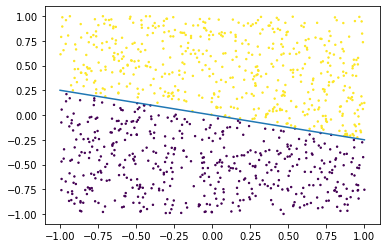

In [ ]:
plt.scatter(X[:,0], X[:,1], c=y_binary, s=2)
plt.plot(np.linspace(-1, 1, 1000), -0.5/2*np.linspace(-1, 1, 1000))
plt.show()

In [ ]:
a = GradientBoostingClassifier( n_estimators=200, learning_rate=0.1, 
                 max_depth=5, random_state=17)
a.fit(X, y_binary)

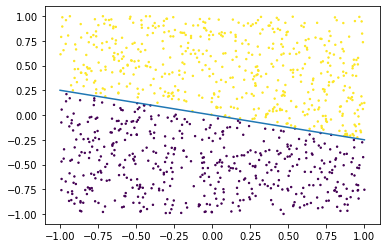

In [ ]:
plt.scatter(X[:,0], X[:,1], c=a.predict(X), s=2)
plt.plot(np.linspace(-1, 1, 1000), -0.5/2*np.linspace(-1, 1, 1000))
plt.show()

In [ ]:
# для задачи многоклассовой классификации
labels = np.where(
    X[:, 0] > X[:, 1], 0, 
    np.where(
        (X[:, 0] < X[:, 1]) & (-X[:, 0] > X[:, 1]), 
        1, 
        2
    )
)

y_multiclass = np.zeros((labels.size, labels.max() + 1))
y_multiclass[np.arange(labels.size), labels] = 1

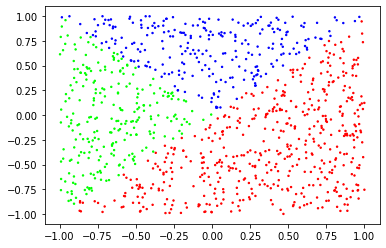

In [ ]:
plt.scatter(X[:,0], X[:,1], c=y_multiclass, s=2)
plt.show()

In [ ]:
y_multiclass.shape

(1000, 3)

In [ ]:
a = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, loss='cross_entropy', max_depth=5, random_state=17)
a.fit(X, y_multiclass)

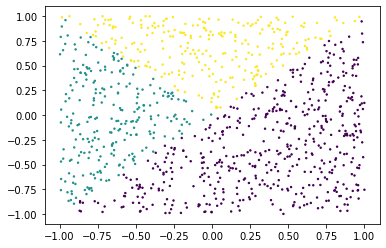

In [ ]:
plt.scatter(X[:,0], X[:,1], c=a.predict(X), s=2)
plt.show()